<a href="https://colab.research.google.com/github/mherbert93/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-03-12 01:46:33--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.140.198
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.140.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.0MB/s    in 4.7s    

2020-03-12 01:46:38 (41.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

products = pd.read_csv('products.csv')

product_list = ["Banana",
"Bag of Organic Bananas",
"Organic Strawberries",
"Organic Baby Spinach",
"Organic Hass Avocado",
"Organic Avocado",
"Large Lemon",
"Strawberries",
"Limes",
"Organic Whole Milk"]

products = products[products['product_name'].isin(product_list)] #contain only the products we're interested in.

products.drop(['aisle_id', 'department_id'], axis=1, inplace=True) #drop un-needed columns.

products.head() #verify columns are removed.



,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana


In [0]:
orders_previous = pd.read_csv('order_products__prior.csv')
orders_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')

print(orders_previous.head())
print(orders_train.head())
orders.head()

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
orders.drop(['order_dow', 'order_hour_of_day', 'days_since_prior_order', 'eval_set', 'user_id'], axis=1, inplace=True) #Drop un-needed columns.

orders.head() #confirm columns are dropped.

,order_id,order_number
0,2539329,1
1,2398795,2
2,473747,3
3,2254736,4
4,431534,5


In [0]:
orders_combined = pd.concat([orders_previous, orders_train]) #combine the two datasets

orders_combined.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
orders_combined_filtered = pd.merge(orders_combined, orders, on='order_id', how='inner') #combine orders and orders_previous by matching order IDs. 

orders_combined_filtered.head()

,order_id,product_id,add_to_cart_order,reordered,order_number
0,2,33120,1,1,3
1,2,28985,2,1,3
2,2,9327,3,0,3
3,2,45918,4,1,3
4,2,30035,5,0,3


In [0]:
combined_dataset = pd.merge(orders_combined_filtered, products, how='inner', on='product_id') #combine into our final dataset containing all orders for the listed items.

print(combined_dataset.head())
combined_dataset.tail() #confirm the products we're looking for are there.

   order_id  product_id  ...  order_number          product_name
0         3       21903  ...            16  Organic Baby Spinach
1        26       21903  ...             2  Organic Baby Spinach
2        31       21903  ...             7  Organic Baby Spinach
3        39       21903  ...             8  Organic Baby Spinach
4        56       21903  ...             8  Organic Baby Spinach

[5 rows x 6 columns]


,order_id,product_id,add_to_cart_order,reordered,order_number,product_name
2418309,3418861,26209,3,1,5,Limes
2418310,3418905,26209,2,1,39,Limes
2418311,3419642,26209,6,0,10,Limes
2418312,3420257,26209,22,1,35,Limes
2418313,3420286,26209,20,0,7,Limes


In [0]:
combined_dataset['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy

table2 = table2.reset_index()

print(table2)

tidy2 = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson']) #convert to tidy format.
tidy2 = tidy2.rename(columns={'variable': 'name', 'index': 'trt', 'value': 'result'}) #rename columns.

tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')

tidy2 = tidy2[['name', 'trt', 'result']] #re-order columns.

tidy2

        index  John Smith  Jane Doe  Mary Johnson
0  treatmenta         NaN      16.0           3.0
1  treatmentb         2.0      11.0           1.0


,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


In [0]:
# tidy -> table2

untidy2 = tidy2.pivot_table(index='name', columns=['trt'], values='result')

untidy2

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
import seaborn as sns
flights = sns.load_dataset('flights')

In [0]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights.head(150)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [0]:
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


# Flights data personal stretch goal - time series forecasting

In [0]:
flights.replace({'month' : {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12}}, inplace=True) #convert month strings to integers.
flights['date'] = pd.to_datetime(flights[['year', 'month']].assign(day=1), infer_datetime_format=True) #create new date column from year and month columns. default day to 1 because we're dealing with monthly data.

from pandas.tseries.offsets import MonthEnd
flights['date'] = pd.to_datetime(flights['date'], format="%Y%m") + MonthEnd(0) #converts to last day of the month. this is so we can set aside out of sample data that can be joined with dates prophet generates(when making future dataframe in prophet by months, it defaults to last day of month.)

flights.drop(['year', 'month'], axis=1, inplace=True) #drop un-needed columns.

flights = flights.rename(columns={'passengers': 'y', 'date': 'ds'}) #rename columns.
flights = flights[['ds', 'y']] #re-order columns.

flights.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
import pandas as pd
from fbprophet import Prophet

model = Prophet(seasonality_mode='multiplicative') #must set to multiplicative seasonality as the default is additive which this dataset is not.
model.fit(flights)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


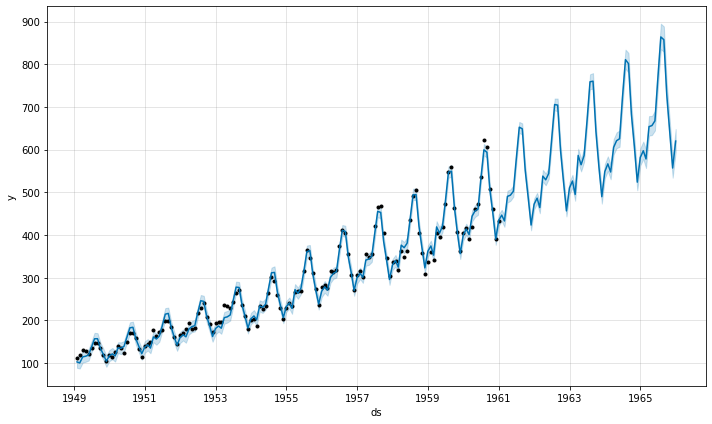

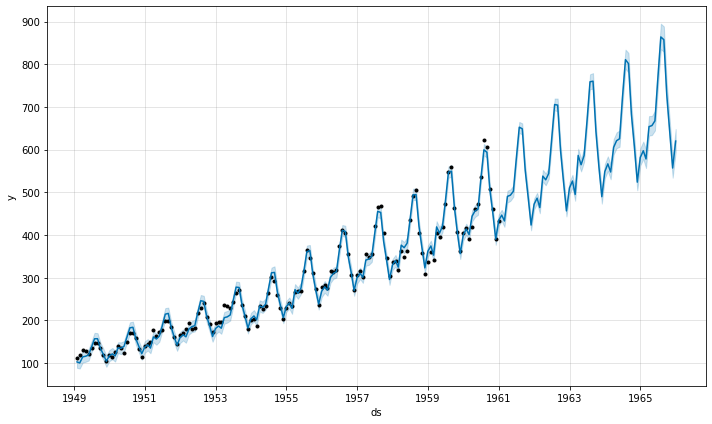

In [0]:
future_df = model.make_future_dataframe(periods=60, freq='M') #create a dataframe containing 60 monthly future dates. 

forecast = model.predict(future_df) #predict the dates contained in the future dataframe.

model.plot(forecast)

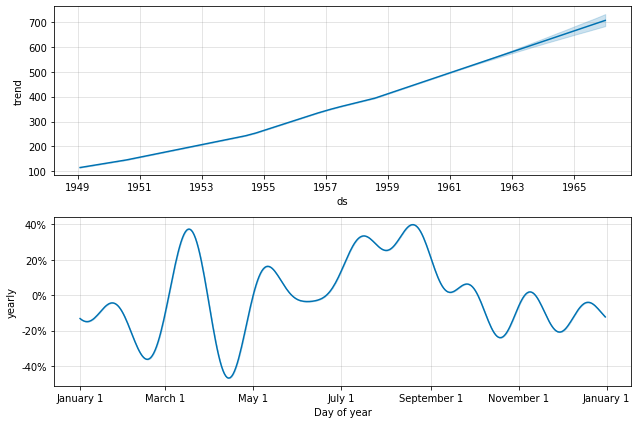

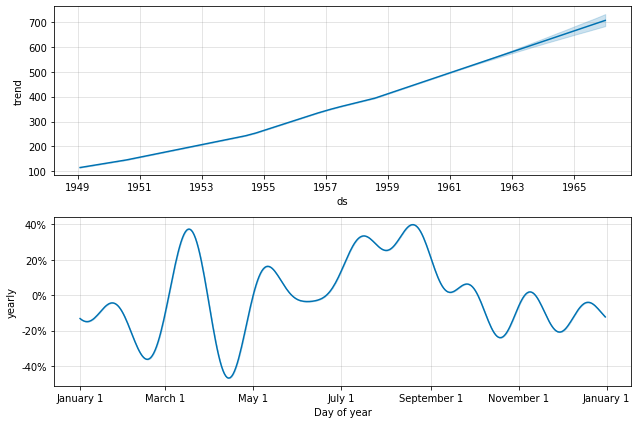

In [0]:
model.plot_components(forecast) #shows the various components of the dataset. Yearly seasonality is shown, but if dealing with daily or weekly seasonality that would show as well. The shaded area in the tend indicates uncertainty by the model.

In [0]:
forecast.head() #Here we can see the predictions(yhat), the uncertainty range(yhat_upper, yhat_lower), as well as the various components the model used. 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-31,115.163622,89.038976,116.529892,115.163622,115.163622,-0.105654,-0.105654,-0.105654,-0.105654,-0.105654,-0.105654,0.0,0.0,0.0,102.996104
1,1949-02-28,116.730055,87.416612,113.502539,116.730055,116.730055,-0.138599,-0.138599,-0.138599,-0.138599,-0.138599,-0.138599,0.0,0.0,0.0,100.551415
2,1949-03-31,118.464319,101.485496,128.385025,118.464319,118.464319,-0.030938,-0.030938,-0.030938,-0.030938,-0.030938,-0.030938,0.0,0.0,0.0,114.799251
3,1949-04-30,120.142640,103.255857,129.751982,120.142640,120.142640,-0.032242,-0.032242,-0.032242,-0.032242,-0.032242,-0.032242,0.0,0.0,0.0,116.268955
4,1949-05-31,121.876905,106.218799,132.816017,121.876905,121.876905,-0.021117,-0.021117,-0.021117,-0.021117,-0.021117,-0.021117,0.0,0.0,0.0,119.303190


# Code after this is not working as intended. Its WIP, will fix when I have time. The idea though is to get an training and testing dataset, which it does, but I cannot get it to plot correctly. 

In [0]:
#Sadly, cross validation with monthly frequency is not available in prophet currently. But we can however manually sample the last 24 months of data vs prediction to get an idea of accuracy in-sample. See https://github.com/facebook/prophet/issues/658
out_of_sample_data = flights.tail(24) #set aside data we want out of sample.
in_sample_data = flights.drop(flights.tail(24).index) #remove the data we want out of sample.


in_sample_data.tail() #verify rows have been removed.

,ds,y
115,1958-08-31,505
116,1958-09-30,404
117,1958-10-31,359
118,1958-11-30,310
119,1958-12-31,337


In [0]:
model_test = Prophet(seasonality_mode='multiplicative') #must set to multiplicative seasonality as the default is additive which this dataset is not.
model_test.fit(in_sample_data) #fit model to our training data.

future_accuracy_df = model_test.make_future_dataframe(periods=24, freq='M') #create a dataframe containing 24 monthly future dates(dates we are going to compare to actuals)

forecast_testing = model_test.predict(future_accuracy_df) #predict the dates contained in the future dataframe.
forecast_testing = pd.concat([])


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#model_test.plot(forecast_testing)

combined_df = pd.merge(forecast_testing, out_of_sample_data, on='ds', how='left') #join the out of sample and insample dataframes back together

In [0]:
forecast_testing.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-31,116.983053,92.227611,114.996633,116.983053,116.983053,-0.109483,-0.109483,-0.109483,-0.109483,-0.109483,-0.109483,0.0,0.0,0.0,104.175405
1,1949-02-28,118.454034,91.331510,116.110364,118.454034,118.454034,-0.128354,-0.128354,-0.128354,-0.128354,-0.128354,-0.128354,0.0,0.0,0.0,103.249977
2,1949-03-31,120.082620,108.146157,132.403887,120.082620,120.082620,-0.001142,-0.001142,-0.001142,-0.001142,-0.001142,-0.001142,0.0,0.0,0.0,119.945498
3,1949-04-30,121.658671,106.501334,128.999175,121.658671,121.658671,-0.035952,-0.035952,-0.035952,-0.035952,-0.035952,-0.035952,0.0,0.0,0.0,117.284750
4,1949-05-31,123.287257,107.922028,130.841016,123.287257,123.287257,-0.031720,-0.031720,-0.031720,-0.031720,-0.031720,-0.031720,0.0,0.0,0.0,119.376593


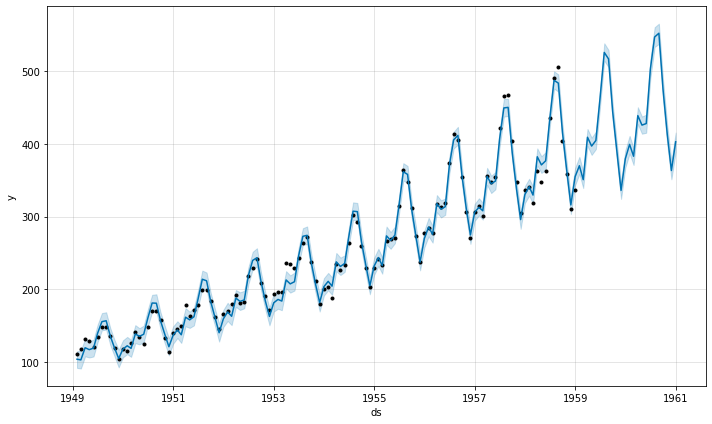

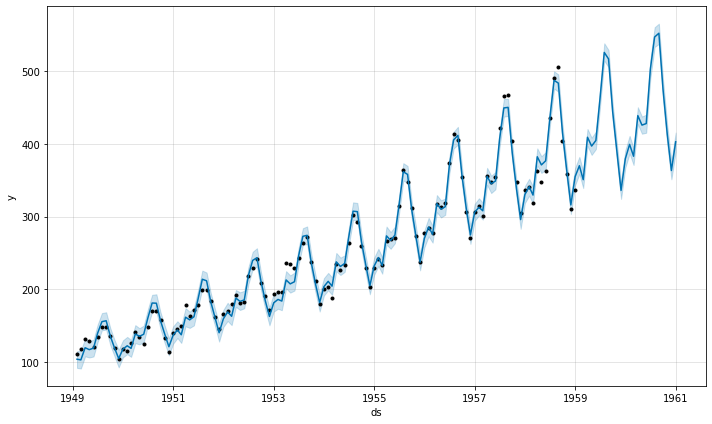

In [0]:
model_test.plot(combined_df)

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####